# Plotting and Exporting Data

In this tutorial, we will be using Kadlu's plotting utilities to visualize environmental data, and we will also be saving data to disk using a few different, common formats.

As always, we begin by importing all necessary modules, classes, functions, etc.

In [1]:
import numpy as np
from datetime import datetime

from kadlu import plot_util
from kadlu import source_map, chs, era5, hycom, wwiii

# enable plots embedded in jupyter notebook:
%matplotlib inline  

The geographical and temporal boundaries are specified as python dictionary, to be passed to the plotting function later. In this example, we are concerned with surface waters (bottom=0, top=0) of the entire Gulf of St. Lawrence ($45^o$N to $50.5^o$N and $-68^o$W to $-57^o$W) on April 1, 2015. 

In [2]:
# figure boundaries to pass as arguments to the plot function
kwargs = dict(
        south=45, west=-68, 
        north=50.5, east=-57,
        bottom=0, top=0,
        start=datetime(2015, 4, 1), end=datetime(2015, 4, 2)
)

## Plotting

Plots can be created by passing a data source string and variable string to the plot2D function in addition to boundary keyword arguments. The following variable strings are accepted: 'bathy', 'temp', 'salinity', or 'waveheight'. 

Note that if the data has not already been fetched, it will be fetched automatically when the plot function is called.

The selected data variable is then shown as function of latitude and longitude, averaged over the specified time window (in this case, 1 day).

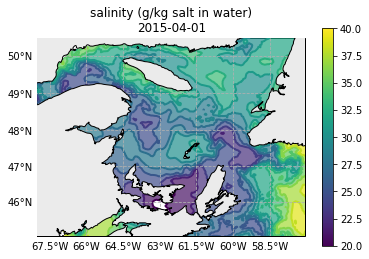

In [3]:
plot_util.plot2D(var='salinity', source='hycom', **kwargs)

Kadlu can also overlay windspeed data on top of a figure using the 'plot_wind' keyword argument. 
The two sources currently supported for windspeed data are 'era5' and 'wwiii'

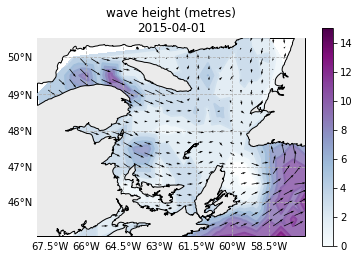

In [4]:
plot_util.plot2D(var='waveheight', source='wwiii', plot_wind='wwiii', **kwargs)

The 'save' keyword argument can be used to save the plot to a file instead of displaying it. Pass a string to set a custom filename, or True to use the default filename

In [5]:
plot_util.plot2D(var='waveheight', source='wwiii', plot_wind='wwiii', save=True, **kwargs)

saving figure to /home/oliskir/src/meridian/kadlu/docs/source/tutorials/plot_export_tutorial/figures/waveheight_2015-04-01.png


## Exporting
Data can be exported to a file by first loading the data and then using numpy to save it:

In [6]:
data = wwiii().load_windwaveheight(**kwargs)
np.savetxt('waveheight.csv', data, delimiter=',')  # save to *.csv file

For more information on exporting data with numpy, consult the numpy docs:
https://docs.scipy.org/doc/numpy/reference/routines.io.html

For saving to MATLAB files, we recommend using scipy's io module: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html

In [7]:
import scipy.io as sio
sio.savemat('waveheight.mat', {'wave_height':data}) # save to *.mat file

For a list of Kadlu's data sources, print the source map:

In [8]:
print(source_map)


    CHS   (Canadian Hydrography Service)
          load_bathymetry:          bathymetric data in Canada's waterways. variable resolution 

    ERA5  (Global environmental dataset from Copernicus Climate Data Store)
          load_windwaveswellheight: combined height of wind, waves, and swell. metres
          load_wavedirection:       mean wave direction, degrees
          load_waveperiod:          mean wave period, seconds
          load_wind_uv:             wind speed computed as sqrt(u^2 + v^2) / 2, where u, v are direction vectors
          load_wind_u:              wind speed coordinate U-vector, m/s
          load_wind_v:              wind speed coordinate V-vector, m/s 

    HYCOM (Hybrid Coordinate Ocean Model)
          load_salinity:            g/kg salt in water
          load_temp:                degrees celsius
          load_water_uv:            ocean current computed as sqrt(u^2 + v^2) / 2, where u, v are direction vectors
          load_water_u:             ocean curre